In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import get_file, to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from IPython.display import clear_output
from tensorflow.keras.utils import plot_model


In [ ]:

# Load the CIFAR-100 dataset and split into training and testing sets
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Define the fine course labels (class names) for CIFAR-100 dataset
cifar100_fine_label = [
    "apple", "aquarium fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup",
    "dinosaur", "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house",
    "kangaroo", "keyboard", "lamp", "lawn mower", "leopard", "lion", "lizard", "lobster", "man",
    "maple", "motorcycle", "mountain", "mouse", "mushroom", "oak", "orange", "orchid", "otter",
    "palm", "pear", "pickup truck", "pine", "plain", "plate", "poppy", "porcupine", "possum",
    "rabbit", "raccoon", "ray", "road", "rocket", "rose", "sea", "seal", "shark", "shrew", "skunk",
    "skyscraper", "snail", "snake", "spider", "squirrel", "streetcar", "sunflower", "sweet pepper",
    "table", "tank", "telephone", "television", "tiger", "tractor", "train", "trout", "tulip",
    "turtle", "wardrobe", "whale", "willow", "wolf", "woman", "worm"
]

# Define a subset of medium-sized mammal classes
medmamals_classes = ["fox", "porcupine", "possum", "raccoon", "skunk"]

# Get the index of each medium-sized mammal class in the CIFAR-100 fine label list
medmamals_indices = [cifar100_fine_label.index(class_name) for class_name in medmamals_classes]

# Create boolean masks to filter training and testing data for the selected mammals
#OHHH SO BASICALLY LIKE SINCE WHEN WE SPLITTED THEM INTO TRAINING AND TESTING SETS EARLIER THE SETS STILL CONTAIN THE OTHER FINE CLASSES AND WE DID THE MASKING USING THE INDEX OF THE MED MAMMALS TO ONLY HAVE MED MAMMALS IN OUR TRAINING AND TESTING DATA SETS
mask_train = np.isin(y_train, medmamals_indices)  # Mask for training set
mask_test = np.isin(y_test, medmamals_indices)  # Mask for testing set

# Filter the training images and labels based on the mask
#so this part na jd gi separate ug sulod ang medmammals na training set nya ang gikuha ra from xtrain/ytrain katong TRUE value na index after masking
x_train_medmamals = x_train[mask_train.flatten()]  # Select images from training set
y_train_medmamals = y_train[mask_train.flatten()]  # Select corresponding labels

# Filter the testing images and labels based on the mask
#same here ra gi segregate ang testing data nga medmammals ra puros from xtest and ytest and ang gikuha ra ang katong TRUE value sa index after masking
x_test_medmamals = x_test[mask_test.flatten()]  # Select images from testing set
y_test_medmamals = y_test[mask_test.flatten()]  # Select corresponding labels

# Convert original labels to range 0-4 instead of original CIFAR-100 indexes
#ahhh so like since ang index nila from the org data set is lagyo gi redefine ila index diri start from 0
y_train_medmamals = np.array([medmamals_indices.index(label) for label in y_train_medmamals.flatten()])
y_test_medmamals = np.array([medmamals_indices.index(label) for label in y_test_medmamals.flatten()])

# Print the number of training and testing samples after filtering
print(f"Training samples: {len(x_train_medmamals)}, Testing samples: {len(x_test_medmamals)}")
print(f"\n")
# Create a DataFrame to visualize the labels of the selected mammals in the training set
df = pd.DataFrame({
    "Index": np.arange(len(y_train_medmamals)),  # Create index column
    "Mammal Class": [medmamals_classes[label] for label in y_train_medmamals]  # Map label to class name
})

# Print the first 10 rows of the DataFrame
print(df.head(10))




169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Training samples: 2500, Testing samples: 500


   Index Mammal Class
0      0       possum
1      1       possum
2      2       possum
3      3        skunk
4      4      raccoon
5      5        skunk
6      6       possum
7      7          fox
8      8       possum
9      9       possum


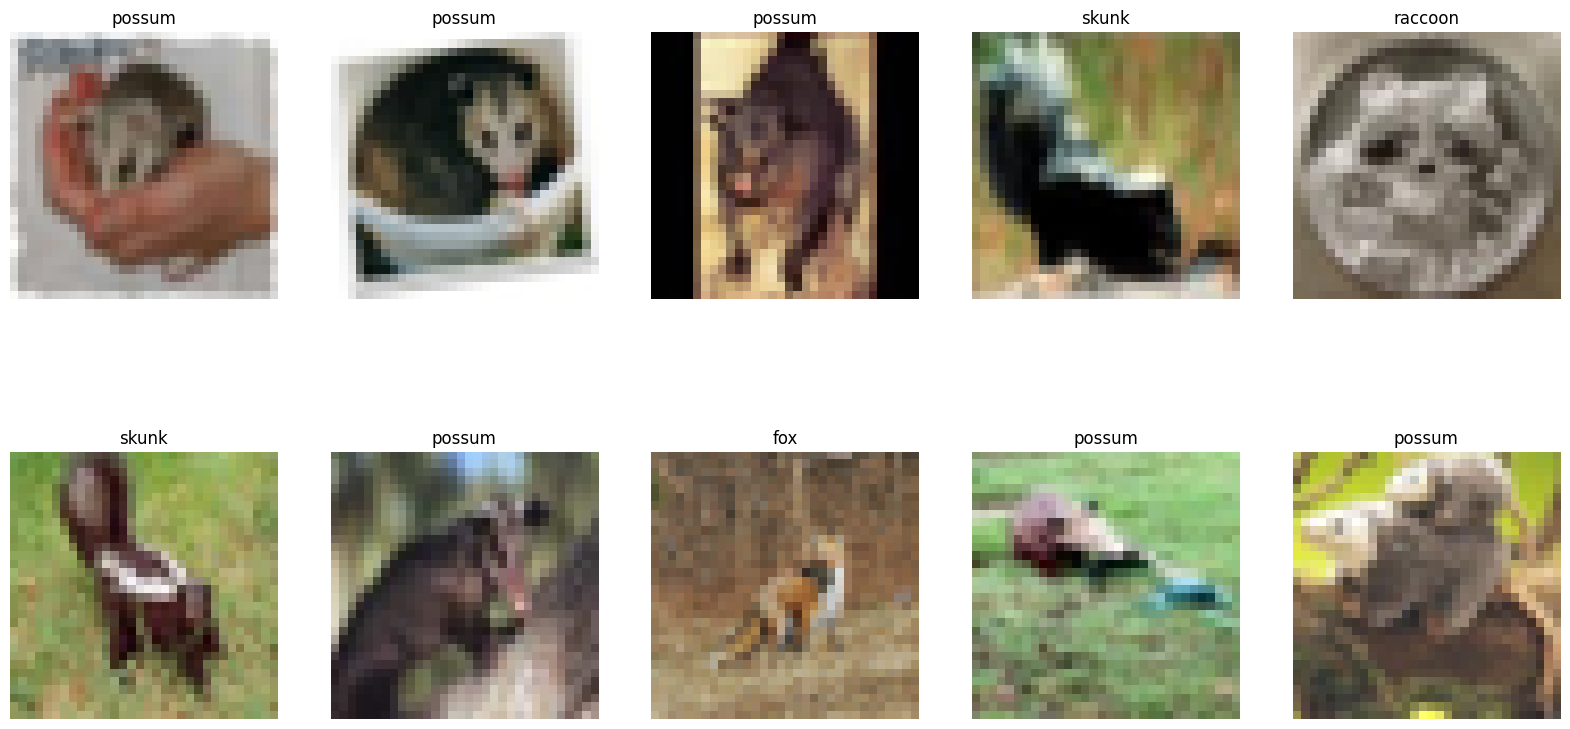

In [ ]:
# Define a function to plot a set of images with their corresponding labels
def plot_images(images, labels, classes, num=10):
    plt.figure(figsize=(20, 10))  # Create a figure with a size of 10x5 inches

    # Loop through the specified number of images to display
    for i in range(num):
        plt.subplot(2, 5, i + 1)  # Create a subplot grid (2 rows, 5 columns) and select the current subplot
        plt.imshow(images[i])  # Display the image at index i
        plt.title(classes[labels[i]])  # Set the title as the corresponding class name
        plt.axis("off")  # Hide the axis for a cleaner look

    plt.show()  # Display the plot

# Call the function to display 10 images from the training dataset of medium-sized mammals
plot_images(x_train_medmamals, y_train_medmamals, medmamals_classes, num=10)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 50)     │        14,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 75)       │        33,825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 75)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 75)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 90)       │        60,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 90)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 360)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        46,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 156,864 (612.75 KB)

 Trainable params: 156,864 (612.75 KB)

 Non-trainable params: 0 (0.00 B)

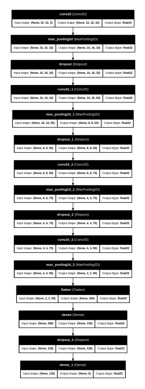

In [ ]:

# Create a Sequential model
model = Sequential([
    Input(shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
    MaxPooling2D(2, 2),
    Dropout(0.053),
    Conv2D(50, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
    MaxPooling2D(2, 2),
    Dropout(0.053),
    Conv2D(75, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
    MaxPooling2D(2, 2),
    Dropout(0.053),
    Conv2D(90, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')
])
# Display the model architecture (layers, parameters, and output shapes)
model.summary()

# Assuming your model is already defined and compiled (e.g., model = Sequential(...))

plot_model(model, to_file='model_plot.png', show_shapes=True, show_dtype=True, show_layer_names=True, rankdir='TB') # Adjust parameters as needed

# (Optional) Display in Colab or Jupyter Notebook
img = plt.imread('model_plot.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# Compile the model with optimizer, loss function, and evaluation metrics
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Use Adam optimizer with a learning rate of 0.001 for efficient gradient updates
    loss="categorical_crossentropy",  # Use categorical cross-entropy as the loss function for multi-class classification
    metrics=["accuracy"]  # Track accuracy as the evaluation metric during training and testing
)

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.2145 - loss: 137.7056 - val_accuracy: 0.2880 - val_loss: 2.7587
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.2793 - loss: 3.9171 - val_accuracy: 0.3000 - val_loss: 1.6249
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.2481 - loss: 1.8765 - val_accuracy: 0.2867 - val_loss: 1.5483
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.2474 - loss: 1.6110 - val_accuracy: 0.2773 - val_loss: 1.5304
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.2528 - loss: 1.5780 - val_accuracy: 0.3467 - val_loss: 1.4403
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.3248 - loss: 1.5137 - val_accuracy: 0.3653 - val_loss: 1.3741
Epoch 7/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.3315 - loss: 1.4666 - val_accuracy: 0.4120 - val_loss: 1.3382
Epoch 8/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.3292 - loss: 1.4769 - val_accuracy:

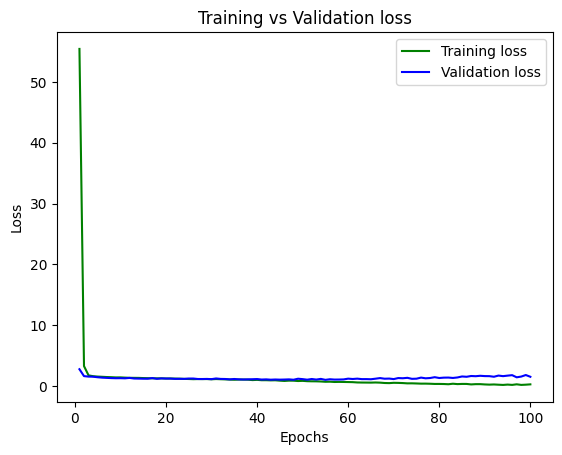

In [ ]:
# Convert training labels to one-hot encoding format (5 classes: 0-4)
y_train_medmamals = to_categorical(y_train_medmamals, num_classes=5)

# Convert testing labels to one-hot encoding format (5 classes: 0-4)
y_test_medmamals = to_categorical(y_test_medmamals, num_classes=5)

# Train the model using the training dataset
metricInfo =  model.fit(
    x_train_medmamals,  # Input training images
    y_train_medmamals,
    epochs=100,
    validation_split=0.3,
    shuffle=True
)

loss = metricInfo.history['loss']
val_loss = metricInfo.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.clf()
plt.plot(epochs, loss, 'g-', label="Training loss")
plt.plot(epochs, val_loss, 'b-', label='Validation loss')
plt.title('Training vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the trained model on the test dataset
test_loss, test_acc = model.evaluate(x_test_medmamals, y_test_medmamals)

# Print the test accuracy with 4 decimal places
print(f"\nTest Accuracy: {test_acc:.4f}")

# Print the test loss with 4 decimal places
print(f"Test Loss: {test_loss:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6922 - loss: 1.6232

Test Accuracy: 0.6800
Test Loss: 1.6872


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


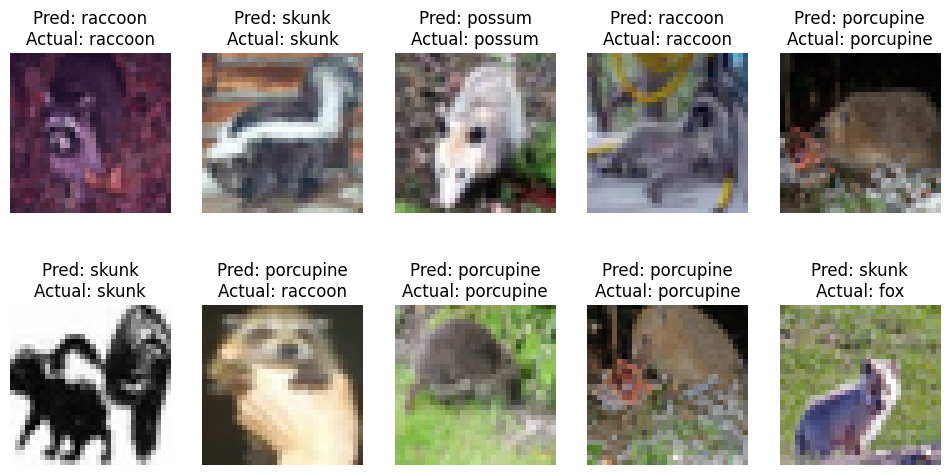

In [ ]:
# Get predictions for the test dataset
predictions = model.predict(x_test_medmamals)

# Convert the model's output probabilities to class labels using argmax (highest probability class)
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded actual labels back to class indices
actual_classes = np.argmax(y_test_medmamals, axis=1)

# Define the number of random test samples to visualize
num_samples = 10

# Randomly select 10 indices from the test dataset (without replacement)
random_indices = np.random.choice(len(x_test_medmamals), num_samples, replace=False)

# Create a figure with specified size for displaying images
plt.figure(figsize=(12, 6))

# Loop through selected indices to plot images along with predictions
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)  # Create a 2-row, 5-column grid for subplots
    plt.imshow(x_test_medmamals[idx])  # Display the selected test image
    plt.title(f"Pred: {medmamals_classes[predicted_classes[idx]]}\n"  # Show predicted class
              f"Actual: {medmamals_classes[actual_classes[idx]]}")  # Show actual class
    plt.axis("off")  # Hide axis for better visualization

# Display the plot with images and their predicted vs. actual labels
plt.show()



In [ ]:
!apt-get install git -qq
!git config --global user.email "iceee.saac@gmail.com"
!git config --global user.name "redernutzz"

In [ ]:
!git clone https://github.com/redernutzz/Mammal-Classification.git

Cloning into 'Mammal-Classification'...


In [ ]:
!cp /content/MammalClassification_MachineLearning.ipynb /content/Mammal-Classification/
%cd /content/Mammal-Classification  # Move into the repo
!git add .                          # Stage all changes
!git commit -m "Uploaded Colab notebook"  # Commit
!git push                          # Push to GitHub

cp: cannot stat '/content/MammalClassification_MachineLearning.ipynb': No such file or directory
[Errno 2] No such file or directory: '/content/Mammal-Classification # Move into the repo'
/content
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
